# Two-way ANOVA

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Create a dataset
df = pd.DataFrame({'water': np.repeat(['daily', 'weekly'], 15),
                    'sun': np.tile(np.repeat(['low', 'medium', 'high'], 5), 2),
                    'height': [6, 6, 6, 5, 6, 5, 5, 6, 4, 5,
                                6, 6, 7, 8, 7, 3, 4, 4, 4, 5,
                                4, 4, 4, 4, 4, 5, 6, 6, 7, 8]})

In [7]:
df.sample(10)

,water,sun,height
17,weekly,low,4
15,weekly,low,3
27,weekly,high,6
11,daily,high,6
10,daily,high,6
2,daily,low,6
4,daily,low,6
8,daily,medium,4
25,weekly,high,5
19,weekly,low,5


/Users/fareed/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sun', ylabel='height'>

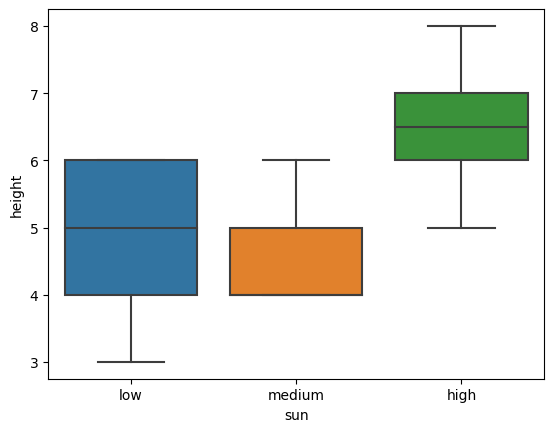

In [8]:
sns.boxplot(df['sun'], df['height'])

/Users/fareed/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sun', ylabel='height'>

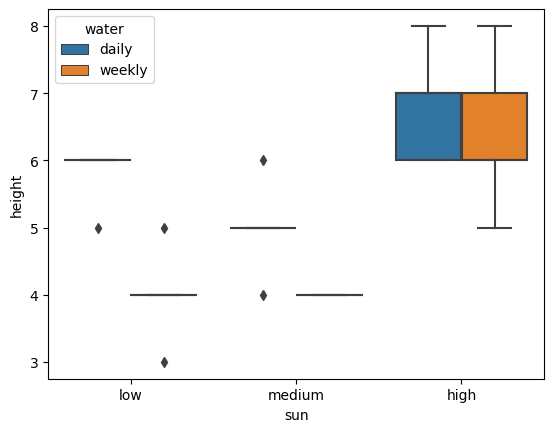

In [9]:
sns.boxplot(df['sun'], df['height'], hue=df['water'])

In [13]:
# Perform Two-way ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA
# One-way ANOVA
model = ols('height ~ sun', data=df).fit()
sm.stats.anova_lm(model, type=2)

,df,sum_sq,mean_sq,F,PR(>F)
sun,2.0,24.866667,12.433333,14.105042,0.000064
Residual,27.0,23.800000,0.881481,NaN,NaN


In [14]:
# Two-way ANOVA
model = ols('height ~ C(sun) + C(water) + C(sun):C(water)', data=df).fit()
sm.stats.anova_lm(model, type=2)

,df,sum_sq,mean_sq,F,PR(>F)
C(sun),2.0,24.866667,12.433333,23.3125,0.000002
C(water),1.0,8.533333,8.533333,16.0000,0.000527
C(sun):C(water),2.0,2.466667,1.233333,2.3125,0.120667
Residual,24.0,12.800000,0.533333,NaN,NaN


In [16]:
# Another way of doing two-way ANOVA
# One-way ANOVA
import pingouin as pg
aov =pg.anova(data=df, dv='height', between='sun', detailed=True)
print(aov)

   Source         SS  DF         MS          F     p-unc       np2
0     sun  24.866667   2  12.433333  14.105042  0.000064  0.510959
1  Within  23.800000  27   0.881481        NaN       NaN       NaN


In [17]:
# Two-way ANOVA
import pingouin as pg
aov =pg.anova(data=df, dv='height', between=['sun', 'water'], detailed=True)
print(aov)

        Source         SS  DF         MS        F     p-unc       np2
0          sun  24.866667   2  12.433333  23.3125  0.000002  0.660177
1        water   8.533333   1   8.533333  16.0000  0.000527  0.400000
2  sun * water   2.466667   2   1.233333   2.3125  0.120667  0.161572
3     Residual  12.800000  24   0.533333      NaN       NaN       NaN


In [ ]:
# How to do Tukey test in Two-way ANOVA
# Lettering or grouping 
# How to do Annotation in graphs?

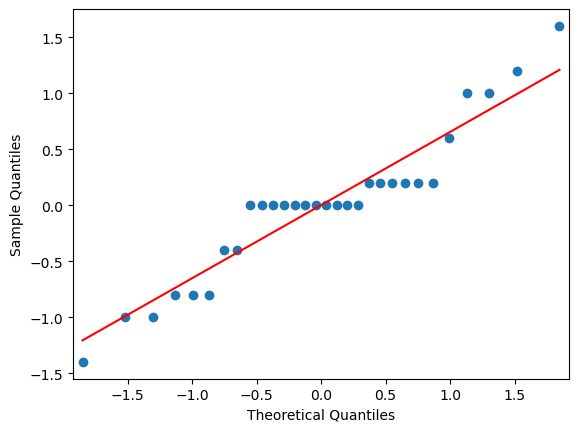

In [18]:
# qq norm plot
res = model.resid
fig = sm.qqplot(res, line='s')
plt.show()